### Python Data Visualization Functions
### ---------------------------------------------------

In [46]:
## Example to read file and create dataframe

import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets


def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'], columns=ds['feature_names'])
    code_species_map = dict(zip(range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df
df = get_iris_df()
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2  

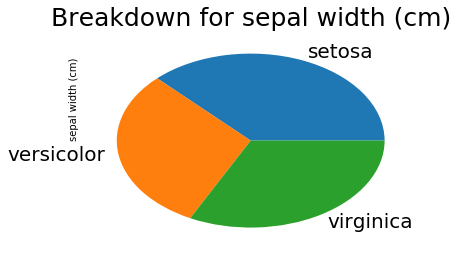

In [8]:
## Pie chart

sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title('Breakdown for ' + var, fontsize=25)
#plt.savefig('iris_pie_for_one_variable.jpg')
plt.show()
plt.close()

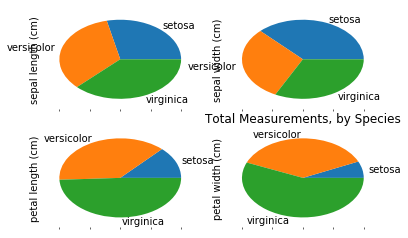

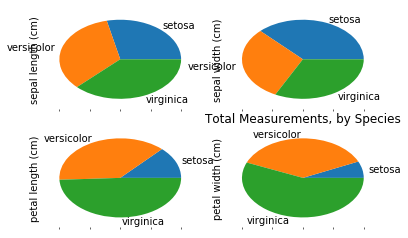

In [10]:
## multiple charts on each coloumn

sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True,
layout=(2,2), legend=False)
plt.title('Total Measurements, by Species')
#plt.savefig('iris_pie_for_each_variable.jpg')
plt.show()
plt.close()

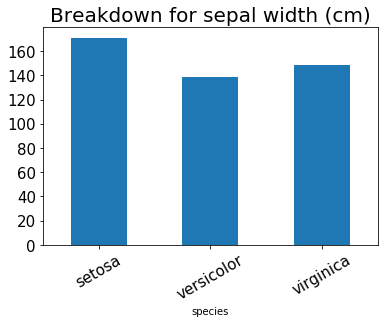

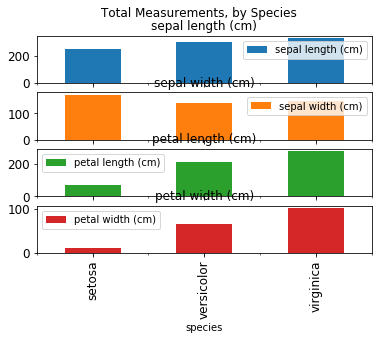

In [16]:
## Bar chart

sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='bar', fontsize=15,
rot=30)
plt.title('Breakdown for ' + var, fontsize=20)
#plt.savefig('iris_bar_for_one_variable.jpg')
plt.show()
plt.close()
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(
kind='bar', subplots=True, fontsize=12)
plt.suptitle('Total Measurements, by Species')
#plt.savefig('iris_bar_for_each_variable.jpg')
plt.show()
plt.close()

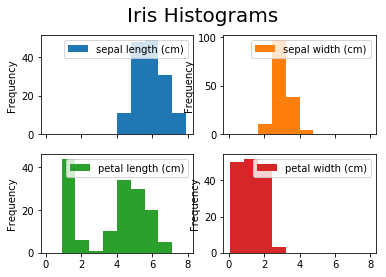

In [17]:
## Histograms

df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Iris Histograms', fontsize=20)
plt.show()

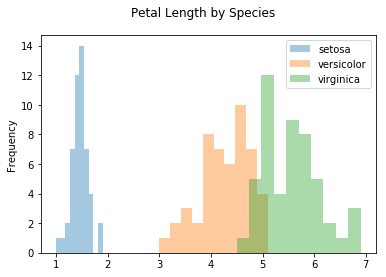

In [20]:
## Histogram on same axes

for spec in df['species'].unique():
    forspec = df[df['species']==spec]
    forspec['petal length (cm)'].plot(kind='hist', alpha=0.4, label=spec)
    plt.legend(loc='upper right')
    plt.suptitle('Petal Length by Species')
    #plt.savefig('iris_hist_by_spec.jpg')
plt.show()


In [21]:
# Means, Standard Deviations, Medians and Quartiles

col = df['petal length (cm)']
Average = col.mean()
print ("Average length of petal ", Average)
Std = col.std()
print ("Standard deviation ", Std)
Median = col.quantile(0.5)
print ("Median of petals are ", Median)
Percentile25 = col.quantile(0.25)
print ("Quantiles wth percentile 25 ", Percentile25)
Percentile75 = col.quantile(0.75)
print ("Quantiles wth percentile 75 ", Percentile75)

Average length of petal  3.7586666666666693
Standard deviation  1.7644204199522617
Median of petals are  4.35
Quantiles wth percentile 25  1.6
Quantiles wth percentile 75  5.1


In [22]:
## REmove outliers from data before calculating avg

col = df['petal length (cm)']
Perc25 = col.quantile(0.25)
Perc75 = col.quantile(0.75)
Clean_Avg = col[(col>Perc25)&(col<Perc75)].mean()
print ("Clean Average ", Clean_Avg)

Clean Average  4.0984375


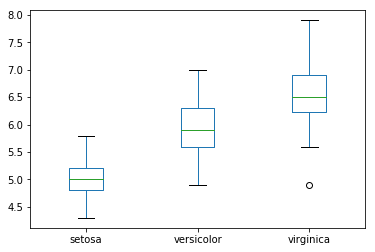

In [24]:
## Box plot of sepal

col = 'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i% 50)
df.pivot('ind','species')[col].plot(kind='box')
plt.show()

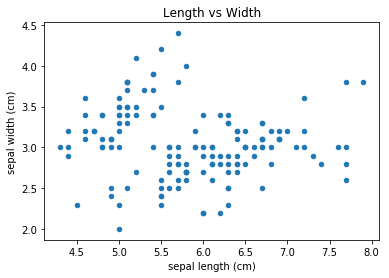

In [27]:
## Scatter plot on the sepal length and width

df.plot(kind="scatter",
x="sepal length (cm)", y="sepal width (cm)")
plt.title("Length vs Width")
plt.show()
plt.close()


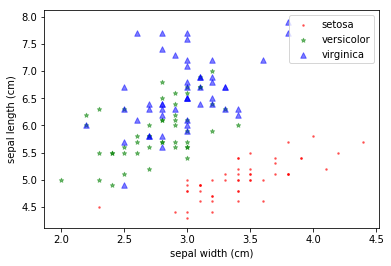

In [28]:
## Scatter plot with colors 

colors = ["r", "g", "b"]
markers= [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique()):
    ddf = df[df['species']==spec]
    ddf.plot(kind="scatter",x="sepal width (cm)", y="sepal length (cm)",
    alpha=0.5, s=10*(i+1), ax=ax,
    color=colors[i], marker=markers[i], label=spec)
plt.legend()
plt.show()

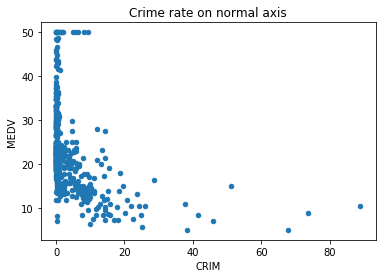

---------
After changing the axis with the log axis


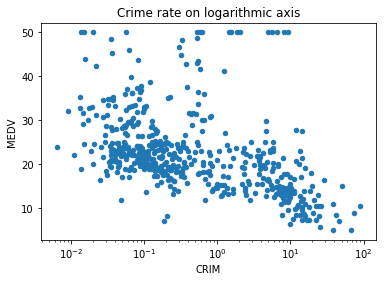

In [36]:
## Scatter plot with the logarithmic axis

import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
# Make Pandas dataframe
bs = ds.load_boston()
df = pd.DataFrame(bs.data, columns=bs.feature_names)
df['MEDV'] = bs.target
# Normal Scatterplot
df.plot(x='CRIM',y='MEDV',kind='scatter')
plt.title('Crime rate on normal axis')
plt.show()

print ("---------")
print ("After changing the axis with the log axis")

df.plot(x='CRIM',y='MEDV',kind='scatter',logx=True)
plt.title('Crime rate on logarithmic axis')
plt.show()
plt.close()

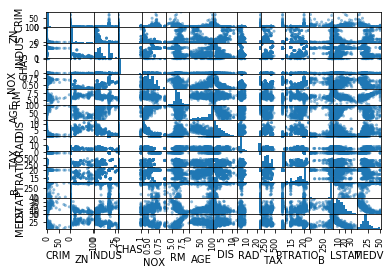

In [35]:
## Scatter Matrices


from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()
plt.close()

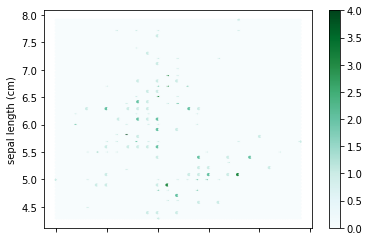

In [48]:
## Heatmaps

df.head

df.plot(kind='hexbin', x='sepal width (cm)', y='sepal length (cm)')
plt.show()
plt.close()

In [53]:
## Correlation

# Pearson corr
print (df["sepal width (cm)"].corr(df["sepal length (cm)"]))
print (df["sepal width (cm)"].corr( df["sepal length (cm)"], method="pearson"))
print (df["sepal width (cm)"].corr( df["sepal length (cm)"], method="spearman"))
print (df["sepal width (cm)"].corr( df["sepal length (cm)"], method="spearman"))

-0.109369249951
-0.109369249951
-0.159456518486
-0.159456518486


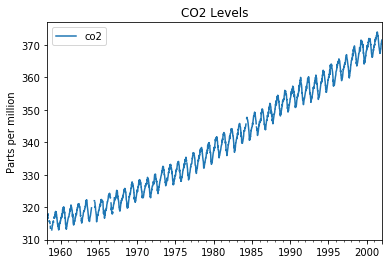

In [56]:
## Simple example of time series data plot

import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("CO2 Levels")
plt.ylabel("Parts per million")
plt.show()

C:\Users\atdee\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


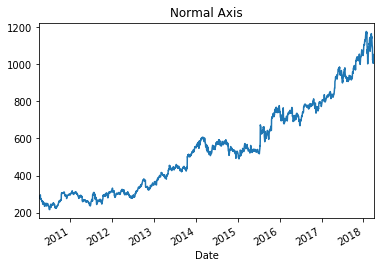

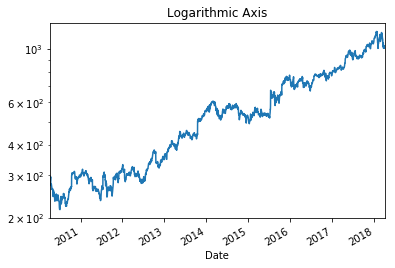

In [2]:
# Google stock since 2010 on a normal logarithmic axes
# Google stock data downloaded from https://finance.yahoo.com/quote/GOOG/history?p=GOOG&c=2000 

import urllib.request as request
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Get raw CSV data from the web

# Make DataFrame, w timestamp as the index
df = pd.read_csv('data_files/GOOG.csv')
df.index = df['Date'].astype('datetime64')
df['LogClose'] = np.log(df['Close'])
df['Close'].plot()
plt.title("Normal Axis")
plt.show()
df['Close'].plot(logy=True)
plt.title("Logarithmic Axis")
plt.show()